# Base de datos
## Wine quality
Esta es una base de datos de acceso público, que se puede encontrar en [kaggle](https://www.kaggle.com/shelvigarg/wine-quality-dataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV

## Part 0: Load data

In [2]:
# Load dataset
data = pd.read_csv("datos/winequalityN.csv")
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# Check whether there are missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Esta sección es para separar las variables tipo ´object´ de las variables numéricas

In [5]:
str_feats, num_feats = [], []

for feature in data.columns:
    if data[feature].dtypes == object:
        str_feats.append(feature)
    else:
        num_feats.append(feature)
        
print(f"String features: {str_feats}")
print(f"Numeric features: {num_feats}")

String features: ['type']
Numeric features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [6]:
# Replace using mean
data.fillna(data[num_feats].mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
# Variable "type" is categorical
data["type"].unique()

array(['white', 'red'], dtype=object)

In [8]:
# Let's change it into numeric (Esta alternativa pierde la información de los nombres de clase)
data["type"] = data["type"].astype('category').cat.codes
data["type"].unique()

array([1, 0], dtype=int8)

In [9]:
#Observamos el conjunto de datos con el tratamiento realizado
data.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,1,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


## Part 1: Regression

In [10]:
# Use all variables, but "quality", as independet variables. And
# use "quality" as target variable.
X = data.columns.to_list()
y = X.pop()
X, y

(['type',
  'fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 'quality')

In [11]:
X = data[X].to_numpy()
Y = data[y].to_numpy()

print(X.shape)
print(Y.shape)

(6497, 12)
(6497,)


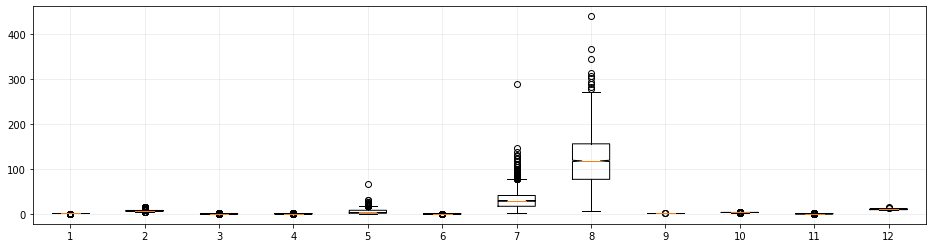

In [12]:
# Look at the independent variables
plt.figure(figsize=(16, 4))
plt.boxplot(X, notch=True)
plt.grid(alpha=0.25)
plt.show()

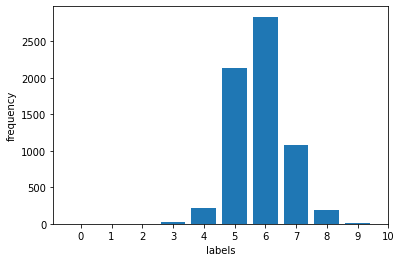

In [13]:
# Look at the target variable
plt.hist(Y, bins=range(max(Y)+2), align='left', rwidth=0.8)
plt.xticks(range(max(Y)+2), labels=range(max(Y)+2))
plt.xlabel('labels')
plt.ylabel('frequency')
plt.show()

In [14]:
# Train-val-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print(f"{len(x_train)} training samples")
print(f"{len(x_val)} validation samples")
print(f"{len(x_test)} test samples")

4677 training samples
1170 validation samples
650 test samples


In [15]:
# Create a linear regression model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [16]:
# Evaluate on training and validation sets
print(f"Classification score on the training set: {linreg.score(x_train, y_train):.3f}")
print(f"Classification score on the validation set: {linreg.score(x_val, y_val):.3f}")

Classification score on the training set: 0.310
Classification score on the validation set: 0.229


In [17]:
# Print coefficients (weights)
linreg.coef_, linreg.intercept_

(array([-3.75446431e-01,  8.07949729e-02, -1.53268398e+00, -1.40469029e-02,
         5.83503838e-02, -7.80021412e-01,  5.80051429e-03, -1.11614307e-03,
        -9.49427137e+01,  5.72047227e-01,  7.09543429e-01,  2.46393538e-01]),
 95.34960509890665)

In [18]:
# See some predictions
y_test_hat = linreg.predict(x_test)

print(["{0:0.0f}".format(i) for i in y_test[:15]])
print(["{0:0.0f}".format(i) for i in y_test_hat[:15]])

['6', '6', '5', '8', '6', '7', '7', '5', '6', '5', '5', '6', '6', '6', '6']
['6', '6', '5', '6', '6', '7', '6', '5', '6', '5', '6', '5', '7', '6', '5']


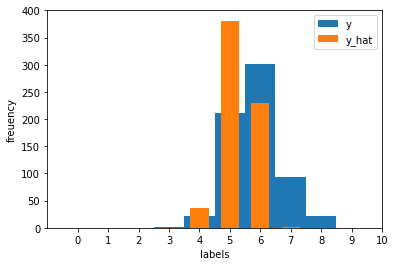

In [19]:
plt.hist(y_test, bins=range(max(Y+2)), align='left', rwidth=8, label='y')
plt.hist(y_test_hat, bins=range(max(Y+2)), align='left', rwidth=0.6, label='y_hat')

plt.xticks(range(max(Y)+2), labels=range(max(Y)+2))
plt.xlabel('labels')
plt.ylabel('freuency')
plt.legend()

plt.show()

In [20]:
# Create a GridSearch object for Lasso regression
parameters = {'alpha': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1., 10]}

gs = GridSearchCV(Lasso(), parameters)
gs.fit(x_train, y_train)

print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.306
Best params: {'alpha': 1e-05}


In [21]:
# Get best model and see its coefficients
lassoreg = gs.best_estimator_
lassoreg.coef_

array([-3.27655012e-01,  6.17499859e-02, -1.54908838e+00, -2.08885255e-02,
        4.95419390e-02, -8.24520438e-01,  5.95603316e-03, -1.18860393e-03,
       -7.21118153e+01,  4.83436359e-01,  6.79072251e-01,  2.71126949e-01])

In [22]:
# Evaluate on training and validation sets
print(f"Classification score on the training set: {lassoreg.score(x_train, y_train):.3f}")
print(f"Classification score on the validation set: {lassoreg.score(x_val, y_val):.3f}")

Classification score on the training set: 0.310
Classification score on the validation set: 0.228


In [23]:
# And now, do it for Ridge and Elastic regression

In [24]:
# Keep the best model among linear, lasso, ridge, and elastic regression, and evaluate it on the test set

## Part 2: Classification

In [25]:
# Use all variables, but "quality", as independet variables. And
# use "quality" as target variable.
y = 'type'
X = data.columns.to_list()
X.remove(y)

X, y

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'],
 'type')

In [26]:
X = data[X].to_numpy()
Y = data[y].to_numpy()

print(X.shape)
print(Y.shape)

(6497, 12)
(6497,)


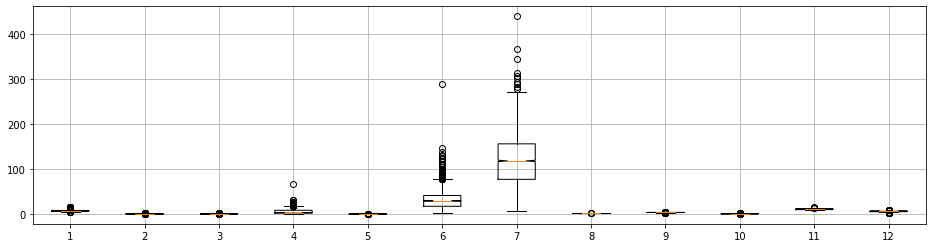

In [27]:
# Look at the independent variables
plt.figure(figsize=(16, 4))
plt.boxplot(X, notch=True)
plt.grid()
plt.show()

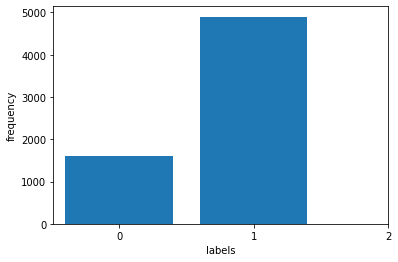

In [28]:
# Look at the target variable
plt.hist(Y, bins=range(max(Y)+2), align='left', rwidth=0.8)
plt.xticks(range(max(Y)+2), labels=range(max(Y)+2))
plt.xlabel('labels')
plt.ylabel('frequency')
plt.show()

In [29]:
# Train-val-test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print(f"{len(x_train)} training samples")
print(f"{len(x_val)} validation samples")
print(f"{len(x_test)} test samples")

4677 training samples
1170 validation samples
650 test samples


In [59]:
# See the documentation for logistic regression, and find a good classification model.
# Hint: explore the hyper-parameters "penalty" and "C".
# Look at the hyper-parameter "class_weight". Can it help somehow?
# Report your results on the training, validation, and test sets